In [1]:
# datasets_52721_99691_student-mat
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [9]:
raw_data = pd.read_csv('datasets_52721_99691_student-mat.csv')
raw_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [10]:
print('Number of null values in each column')
raw_data.isnull().sum()

Number of null values in each column


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Pre-processing
* Initially object columns have to be encoded, hence they are seperated
* After completing the encoding, they are joined

In [18]:
df_object = raw_data.select_dtypes(include='object')
df_exclude_object = raw_data.select_dtypes(exclude='object')


In [19]:
for i in range(len(df_object.columns)):
    print(df_object.columns[i], df_object[df_object.columns[i]].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


__All the object columns are categorical__
* Hence will do encoding to the categorical columns

In [20]:
for i in range(len(df_object.columns)):    
    encoder = LabelEncoder()
    encoder.fit(df_object.iloc[:,i].unique())
    df_object.iloc[:,i] = encoder.transform(df_object.iloc[:,i])
df_object

C:\Users\Arjun Janamatti\Anaconda3\envs\abcd\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Arjun Janamatti\Anaconda3\envs\abcd\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,1,1,0,3,3,0,2,0,1,1,0,1,1,0,0
391,1,1,1,1,1,3,3,0,1,0,0,0,0,0,1,1,0
392,1,1,0,0,1,2,2,0,2,0,0,0,0,0,1,0,0
393,1,1,0,1,1,3,2,0,1,0,0,0,0,0,1,1,0


In [21]:
df = df_object.join(df_exclude_object)
df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1,0,0,0,4,0,1,1,...,4,3,4,1,1,3,6,5,6,6
1,0,0,1,0,1,0,2,0,0,0,...,5,3,3,1,1,3,4,5,5,6
2,0,0,1,1,1,0,2,2,1,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,1,0,1,1,3,1,1,0,...,3,2,2,1,1,5,2,15,14,15
4,0,0,1,0,1,2,2,1,0,0,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,1,1,0,3,3,0,2,0,...,5,5,4,4,5,4,11,9,9,9
391,1,1,1,1,1,3,3,0,1,0,...,2,4,5,3,4,2,3,14,16,16
392,1,1,0,0,1,2,2,0,2,0,...,5,5,3,3,3,3,3,10,8,7
393,1,1,0,1,1,3,2,0,1,0,...,4,4,1,3,4,5,0,11,12,10


In [22]:
def split_for_validation(a,n):
    '''
    a = dataframe,
    n = percentage of split
    '''
    return a[: len(a) - (int(len(a) * n))].copy(), a[len(a) - (int(len(a) * n)):].copy()  

In [28]:
def rand_forest_regressor(raw_data, validation_split):
    feature_columns = raw_data.iloc[:,:-1].values
    dependent_column = raw_data.iloc[:,-1].values
    X_train, X_valid = split_for_validation(a = feature_columns,
                                            n = validation_split)
    y_train, y_valid = split_for_validation(a = dependent_column,
                                            n = validation_split)
    print('Training data: ', X_train.shape, y_train.shape)
    print('Validation data: ', X_valid.shape, y_valid.shape)

    m = RandomForestRegressor(n_jobs=-1)
    m.fit(X_train, y_train)

    predTree = m.predict(X_valid)
    print()
    print('Training accuracy: ', round((m.score(X_train, y_train))*100,2),'%')
    print()
    print('Validation accuracy: ', round((m.score(X_valid, y_valid))*100,2),'%')

    
    plt.figure(figsize=(10,6))
    plt.scatter(x = list(range(len(y_valid))), y = y_valid, marker = 'X')
    plt.scatter(x = list(range(len(predTree))), y = predTree, marker = '^')
    plt.xlabel('Series')
    plt.ylabel(raw_data.columns[-1])
    plt.legend(['Actual value', 'Predicted value'])
    plt.title('Scatter plot to compare results of actual and predicted value for validation dataset')
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.plot(abs(predTree - y_valid), marker = '^', c = 'g')
    plt.xlabel('Series')
    plt.ylabel(raw_data.columns[-1])
    plt.legend(['Absolute difference between predicted and actual value'])
    plt.title('Plot absolute difference of actual and predicted value for validation dataset')
    plt.show()
    

Training data:  (316, 32) (316,)
Validation data:  (79, 32) (79,)

Training accuracy:  98.55 %

Validation accuracy:  81.05 %


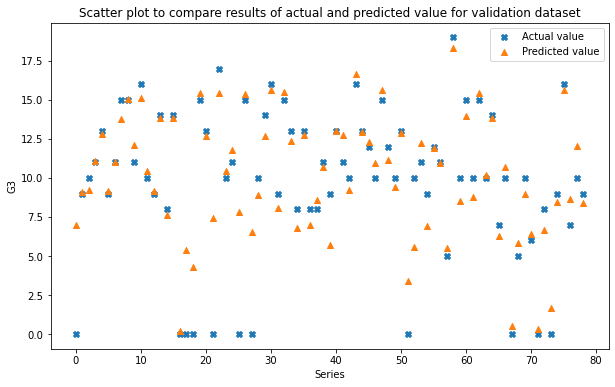

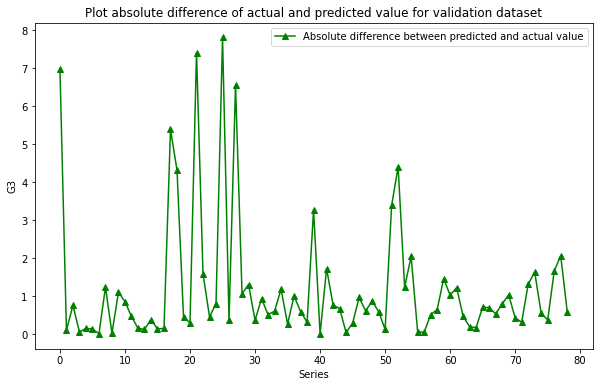

In [29]:
raw_data = shuffle(raw_data)
rand_forest_regressor(raw_data = df,
                       validation_split = 0.2)